In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train[8794]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 134,
        253, 255, 253, 253, 213,  36,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

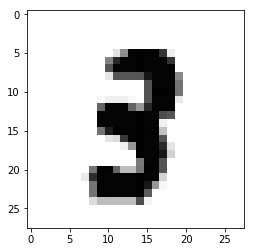

In [7]:
plt.imshow(x_train[8794], cmap="Greys")

In [8]:
y_train[8794]

3

In [9]:
x_train[8794].shape

(28, 28)

In [10]:
from keras.utils import np_utils

In [11]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [12]:
x_train[8794].shape

(784,)

In [13]:
from keras.utils import np_utils

In [14]:
y_train = np_utils.to_categorical(y_train, 10)

In [15]:
y_test = np_utils.to_categorical(y_test, 10)

In [16]:
y_train[8794]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import  SGD

In [18]:
model_1 = Sequential()

In [19]:
model_1.add(Dense(4, input_dim=784))
model_1.add(Activation("sigmoid"))

In [20]:
model_1.add(Dense(2))
model_1.add(Activation("sigmoid"))

In [21]:
model_1.add(Dense(10))
model_1.add(Activation("softmax"))

In [22]:
model_1.compile(loss = 'mse', 
              optimizer = SGD(lr=0.087),
              metrics = ["accuracy"])

In [23]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_1_20 = model_1.fit(x_train, y_train, 
          batch_size=100, 
          epochs=20, 
          verbose=1, 
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0899 - acc: 0.1269 - val_loss: 0.0897 - val_acc: 0.1596
Epoch 2/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0895 - acc: 0.1732 - val_loss: 0.0893 - val_acc: 0.1898
Epoch 3/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0892 - acc: 0.2020 - val_loss: 0.0890 - val_acc: 0.2080
Epoch 4/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0889 - acc: 0.2131 - val_loss: 0.0888 - val_acc: 0.2120
Epoch 5/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0887 - acc: 0.2128 - val_loss: 0.0886 - val_acc: 0.2211
Epoch 6/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0885 - acc: 0.2238 - val_loss: 0.0884 - val_acc: 0.2197
Epoch 7/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0883 - acc: 0.2105 - val_loss: 0.0883 - val_acc

In [25]:
from ipywidgets import interact_manual

In [26]:
predict = model_1.predict_classes(x_test)

In [27]:
model_1.predict(x_test)[0]

array([0.13082674, 0.07641927, 0.06786137, 0.1264734 , 0.10214452,
       0.10232624, 0.06602959, 0.15220281, 0.05780254, 0.11791342],
      dtype=float32)

In [28]:
def test(num):
    plt.imshow(x_test[num].reshape(28,28), cmap="Greys")
    print("神經網路判斷為:", predict[num])

In [29]:
interact_manual(test, num =(0,9999))

interactive(children=(IntSlider(value=4999, description='num', max=9999), Button(description='Run Interact', s…

<function __main__.test(num)>

In [30]:
score = model_1.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 18us/step


In [31]:
score

[0.08585815453529358, 0.2084]

In [32]:
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1])

測試資料的 loss: 0.08585815453529358
測試資料正確率: 0.2084


In [33]:
x_train_1 = x_train / x_train.max()
x_test_1 = x_test / x_test.max()

In [34]:
x_train_1.max()

1.0

In [35]:
x_train_2 = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_2 = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [36]:
x_train_2.max()

1.0

In [51]:
model_2 = Sequential()
model_2.add(Dense(4, input_dim=784))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(2))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(10))
model_2.add(Activation("softmax"))
model_2.compile(loss = 'mse', 
              optimizer = SGD(lr=0.05),
              metrics = ["accuracy"])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_10 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_11 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_12 (Activation)   (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


# 將 optimizer 改為 adam ，accuracy 顯著提高至 0.6

In [54]:
model_2 = Sequential()
model_2.add(Dense(4, input_dim=784))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(2))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(10))
model_2.add(Activation("softmax"))
model_2.compile(loss = 'mse', 
              optimizer = 'adam',
              metrics = ["accuracy"])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_16 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_17 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_18 (Activation)   (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [55]:
model_2_20 = model_2.fit(x_train_1, y_train,
                        batch_size = 100,
                        epochs = 20,
                        verbose = 1,
                        validation_data = (x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0877 - acc: 0.1771 - val_loss: 0.0850 - val_acc: 0.2792
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0829 - acc: 0.2943 - val_loss: 0.0809 - val_acc: 0.3066
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0786 - acc: 0.3499 - val_loss: 0.0757 - val_acc: 0.3737
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0733 - acc: 0.4172 - val_loss: 0.0708 - val_acc: 0.4777
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0692 - acc: 0.4857 - val_loss: 0.0674 - val_acc: 0.5090
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0663 - acc: 0.5425 - val_loss: 0.0650 - val_acc: 0.5779
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0642 - acc: 0.5865 - val_loss: 0.0631 - val_acc

# 將 loss  改為 categorical_crossentropy,  accuracy 無顯著改善依然 0.6

In [56]:
model_2 = Sequential()
model_2.add(Dense(4, input_dim=784))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(2))
model_2.add(Activation("sigmoid"))
model_2.add(Dense(10))
model_2.add(Activation("softmax"))
model_2.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam',
              metrics = ["accuracy"])
model_2.summary()

model_2_20 = model_2.fit(x_train_1, y_train,
                        batch_size = 100,
                        epochs = 20,
                        verbose = 1,
                        validation_data = (x_test_1, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 4)                 3140      
_________________________________________________________________
activation_19 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_20 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                30        
_________________________________________________________________
activation_21 (Activation)   (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________
Train on

# 將 optimizer 改為 adam ，accuracy 提高至 0.6
# 使用三層神經網路一直無法將 accuracy 提高，因此改為二層，顯著提高至 0.8
# 再將Dense 加到50個終於提高至 0.97


In [66]:
model_2 = Sequential()
model_2.add(Dense(50, input_dim=784))
model_2.add(Activation("relu"))
#model_2.add(Dense(2))
#model_2.add(Activation("relu"))
model_2.add(Dense(10))
model_2.add(Activation("softmax"))
model_2.compile(loss = 'mse', 
              optimizer = 'adam',
              metrics = ["accuracy"])
model_2.summary()

model_2_20 = model_2.fit(x_train_1, y_train,
                        batch_size = 100,
                        epochs = 20,
                        verbose = 1,
                        validation_data = (x_test_1, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 50)                39250     
_________________________________________________________________
activation_48 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                510       
_________________________________________________________________
activation_49 (Activation)   (None, 10)                0         
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0181 - acc: 0.8862 - val_loss: 0.0102 - val_acc: 0.9358
Epoch 2/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.00

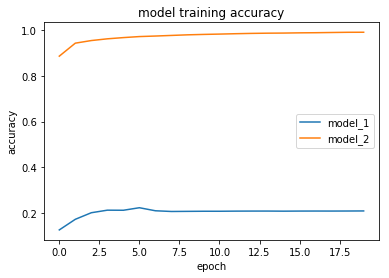

In [67]:
plt.plot(model_1_20.history["acc"])
plt.plot(model_2_20.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model_1", "model_2"], loc = "best")
plt.show()

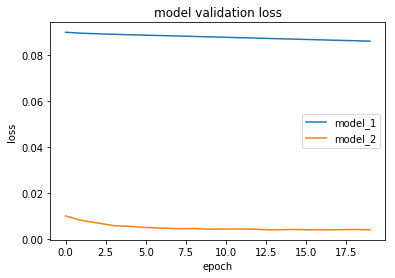

In [68]:
plt.plot(model_1_20.history["val_loss"])
plt.plot(model_2_20.history["val_loss"])

plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["model_1", "model_2"], loc = "best")
plt.show()